# DATA PRE-PROCESSING - Advanced study of epigenetic mechanisms in the development of neoplasms 

In this notebook, I will evaluate and define the most appropriate **pre-processing operations** (in the next notebook), also in relation to the thesis work of *Nastaran Ahmadi Bonakdare* and the procedures described in the article “*Early detection and diagnosis of cancer with interpretable machine learning to uncover cancer-specific DNA methylation patterns*” (Izzy Newsham et al., MRC Cancer Unit, University of Cambridge).

### Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import median_abs_deviation
import warnings

### Import dataset 

In [3]:
# Find dataset's path 
file_path = '/kaggle/input/raw-dataset/GSE69914_series_matrix.csv'  # file's path
raw_dataset = pd.read_csv(file_path)

# Delete the first column relating to the CpG index
raw_dataset.set_index('ID_REF', inplace=True)

# I transpose the dataset so that each row represents a sample and each column corresponds to a CpG site (feature)
raw_dataset = raw_dataset.T

In [8]:
prova = raw_dataset.copy()

## Data Pre-Processing
### Step 1 — Sample Grouping and Label Assignment

As a first preprocessing step, the samples were grouped into three biological categories based on the classification reported on the GEO portal **[1]**, as referenced in Bonakdare’s work. Specifically, the dataset includes 407 samples in total, which were assigned to one of the following groups:

* **0** = Normal
* **1** = Adjacent-normal
* **2** = Tumor

All samples were retained, including those characterized as BRCA1-normal and BRCA1-tumor, which were incorporated into the respective normal and tumor groups for this initial stage. This labeling provides a consistent structure for downstream preprocessing and analysis.

**Open consideration — BRCA1-specific samples:**
A question arises regarding the treatment of BRCA1-positive samples currently embedded within the normal and tumor classes. Given the relatively limited sample size, is it more appropriate to retain these cases within their broader biological groups (as done here), remove them to avoid potential confounding, or define them as separate categories for downstream stratification? For the moment, they have been included in the main classes, with the option of excluding or reclassifying them at a later stage without affecting the current workflow.

- `normal_brca1_samples = \['GSM1712378', 'GSM1712392', 'GSM1712420', 'GSM1712442', 'GSM1712476', 'GSM1712560', 'GSM1712650', 'GSM1712724']`
- `cancer_brca1_samples = \['GSM1712411', 'GSM1712427', 'GSM1712636']`

If batch correction becomes necessary at a later stage, I can retrieve technical batch information from the GEO sample pages (GSM entries). Each GSM record typically includes a ‘Sentrix ID’ or ‘methylation barcode’, which identifies the slide or array on which the sample was processed. These slide-level identifiers can be used to group samples into technical batches. Including such batch covariates in downstream analysis (e.g., during normalization or differential methylation testing) can help remove non-biological variation introduced by processing differences across arrays or time. This step would only be required if exploratory analyses later reveal clustering, bias, or unwanted variability that is not explained by biological groups alone.

In [4]:
# Each sample is assigned a status: normal, adjacent, tumour

# 0 - Normal
normal_samples = [
    'GSM1712369', 'GSM1712385', 'GSM1712398', 'GSM1712412', 'GSM1712419', 'GSM1712423',
    'GSM1712435', 'GSM1712439', 'GSM1712440', 'GSM1712449', 'GSM1712464', 'GSM1712472',
    'GSM1712489', 'GSM1712490', 'GSM1712504', 'GSM1712535', 'GSM1712541', 'GSM1712551',
    'GSM1712565', 'GSM1712566', 'GSM1712574', 'GSM1712578', 'GSM1712583', 'GSM1712598',
    'GSM1712609', 'GSM1712615', 'GSM1712620', 'GSM1712625', 'GSM1712633', 'GSM1712648',
    'GSM1712649', 'GSM1712660', 'GSM1712661', 'GSM1712664', 'GSM1712678', 'GSM1712682',
    'GSM1712683', 'GSM1712693', 'GSM1712700', 'GSM1712713', 'GSM1712721', 'GSM1712723',
    'GSM1712733', 'GSM1712745', 'GSM1712755', 'GSM1712763', 'GSM1712772', 'GSM1712776', 
    'GSM1712378', 'GSM1712392', 'GSM1712420', 'GSM1712442', 'GSM1712476', 'GSM1712560',
    'GSM1712650', 'GSM1712724'
]

# 1 - Adjacent-Normal
adjacent_normal_samples = [
    'GSM1712368', 'GSM1712372', 'GSM1712383', 'GSM1712390', 'GSM1712405', 'GSM1712436',
    'GSM1712450', 'GSM1712457', 'GSM1712465', 'GSM1712466', 'GSM1712473', 'GSM1712475',
    'GSM1712487', 'GSM1712500', 'GSM1712503', 'GSM1712510', 'GSM1712511', 'GSM1712520',
    'GSM1712523', 'GSM1712528', 'GSM1712538', 'GSM1712548', 'GSM1712549', 'GSM1712558',
    'GSM1712572', 'GSM1712581', 'GSM1712595', 'GSM1712597', 'GSM1712606', 'GSM1712610',
    'GSM1712611', 'GSM1712612', 'GSM1712613', 'GSM1712614', 'GSM1712616', 'GSM1712632',
    'GSM1712642', 'GSM1712644', 'GSM1712672', 'GSM1712687', 'GSM1712701', 'GSM1712706',
    'GSM1712708', 'GSM1712727', 'GSM1712737', 'GSM1712739', 'GSM1712743', 'GSM1712752',
    'GSM1712777'
]

# 2 - Breast Cancer
breast_cancer_samples = [
    'GSM1712367', 'GSM1712370', 'GSM1712371', 'GSM1712373', 'GSM1712374', 'GSM1712375',
    'GSM1712376', 'GSM1712377', 'GSM1712379', 'GSM1712380', 'GSM1712382', 'GSM1712381',
    'GSM1712384', 'GSM1712386', 'GSM1712387', 'GSM1712388', 'GSM1712389', 'GSM1712391',
    'GSM1712393', 'GSM1712394', 'GSM1712395', 'GSM1712396', 'GSM1712397', 'GSM1712399',
    'GSM1712400', 'GSM1712401', 'GSM1712402', 'GSM1712403', 'GSM1712404', 'GSM1712406',
    'GSM1712407', 'GSM1712408', 'GSM1712409', 'GSM1712410', 'GSM1712413', 'GSM1712414',
    'GSM1712415', 'GSM1712416', 'GSM1712417', 'GSM1712418', 'GSM1712421', 'GSM1712422',
    'GSM1712424', 'GSM1712425', 'GSM1712426', 'GSM1712428', 'GSM1712429', 'GSM1712430',
    'GSM1712431', 'GSM1712432', 'GSM1712433', 'GSM1712434', 'GSM1712437', 'GSM1712438',
    'GSM1712441', 'GSM1712443', 'GSM1712444', 'GSM1712445', 'GSM1712446', 'GSM1712447',
    'GSM1712448', 'GSM1712451', 'GSM1712452', 'GSM1712453', 'GSM1712454', 'GSM1712455',
    'GSM1712456', 'GSM1712458', 'GSM1712459', 'GSM1712460', 'GSM1712461', 'GSM1712462',
    'GSM1712463', 'GSM1712467', 'GSM1712468', 'GSM1712469', 'GSM1712470', 'GSM1712471',
    'GSM1712474', 'GSM1712477', 'GSM1712478', 'GSM1712479', 'GSM1712480', 'GSM1712482',
    'GSM1712483', 'GSM1712484', 'GSM1712485', 'GSM1712486', 'GSM1712488', 'GSM1712491',
    'GSM1712492', 'GSM1712493', 'GSM1712494', 'GSM1712495', 'GSM1712496', 'GSM1712497',
    'GSM1712498', 'GSM1712499', 'GSM1712501', 'GSM1712502', 'GSM1712505', 'GSM1712506',
    'GSM1712507', 'GSM1712508', 'GSM1712509', 'GSM1712481', 'GSM1712512', 'GSM1712513',
    'GSM1712514', 'GSM1712515', 'GSM1712516', 'GSM1712517', 'GSM1712518', 'GSM1712519',
    'GSM1712521', 'GSM1712522', 'GSM1712524', 'GSM1712525', 'GSM1712526', 'GSM1712527',
    'GSM1712529', 'GSM1712530', 'GSM1712531', 'GSM1712532', 'GSM1712533', 'GSM1712534',
    'GSM1712536', 'GSM1712537', 'GSM1712539', 'GSM1712540', 'GSM1712542', 'GSM1712543',
    'GSM1712544', 'GSM1712545', 'GSM1712546', 'GSM1712547', 'GSM1712550', 'GSM1712552',
    'GSM1712553', 'GSM1712554', 'GSM1712555', 'GSM1712556', 'GSM1712557', 'GSM1712559',
    'GSM1712561', 'GSM1712562', 'GSM1712563', 'GSM1712564', 'GSM1712567', 'GSM1712568',
    'GSM1712569', 'GSM1712570', 'GSM1712571', 'GSM1712573', 'GSM1712575', 'GSM1712576',
    'GSM1712577', 'GSM1712579', 'GSM1712580', 'GSM1712582', 'GSM1712584', 'GSM1712585',
    'GSM1712586', 'GSM1712587', 'GSM1712588', 'GSM1712589', 'GSM1712590', 'GSM1712591',
    'GSM1712592', 'GSM1712593', 'GSM1712594', 'GSM1712596', 'GSM1712599', 'GSM1712600',
    'GSM1712601', 'GSM1712602', 'GSM1712603', 'GSM1712604', 'GSM1712605', 'GSM1712607',
    'GSM1712608', 'GSM1712617', 'GSM1712618', 'GSM1712619', 'GSM1712621', 'GSM1712622',
    'GSM1712623', 'GSM1712624', 'GSM1712626', 'GSM1712627', 'GSM1712628', 'GSM1712629',
    'GSM1712630', 'GSM1712631', 'GSM1712634', 'GSM1712635', 'GSM1712637', 'GSM1712638',
    'GSM1712639', 'GSM1712640', 'GSM1712641', 'GSM1712643', 'GSM1712645', 'GSM1712646',
    'GSM1712647', 'GSM1712651', 'GSM1712652', 'GSM1712653', 'GSM1712654', 'GSM1712655',
    'GSM1712656', 'GSM1712657', 'GSM1712658', 'GSM1712659', 'GSM1712662', 'GSM1712663',
    'GSM1712665', 'GSM1712666', 'GSM1712667', 'GSM1712668', 'GSM1712669', 'GSM1712670',
    'GSM1712671', 'GSM1712673', 'GSM1712674', 'GSM1712675', 'GSM1712676', 'GSM1712677',
    'GSM1712679', 'GSM1712680', 'GSM1712681', 'GSM1712684', 'GSM1712685', 'GSM1712686',
    'GSM1712688', 'GSM1712689', 'GSM1712690', 'GSM1712691', 'GSM1712692', 'GSM1712694',
    'GSM1712695', 'GSM1712696', 'GSM1712697', 'GSM1712698', 'GSM1712699', 'GSM1712702',
    'GSM1712703', 'GSM1712704', 'GSM1712705', 'GSM1712707', 'GSM1712709', 'GSM1712710',
    'GSM1712711', 'GSM1712712', 'GSM1712714', 'GSM1712715', 'GSM1712716', 'GSM1712717',
    'GSM1712718', 'GSM1712719', 'GSM1712720', 'GSM1712722', 'GSM1712725', 'GSM1712726',
    'GSM1712728', 'GSM1712729', 'GSM1712730', 'GSM1712731', 'GSM1712732', 'GSM1712734',
    'GSM1712735', 'GSM1712736', 'GSM1712738', 'GSM1712740', 'GSM1712741', 'GSM1712742',
    'GSM1712744', 'GSM1712746', 'GSM1712747', 'GSM1712748', 'GSM1712749', 'GSM1712750',
    'GSM1712751', 'GSM1712753', 'GSM1712754', 'GSM1712756', 'GSM1712758', 'GSM1712760',
    'GSM1712766', 'GSM1712767', 'GSM1712768', 'GSM1712769', 'GSM1712770', 'GSM1712771',
    'GSM1712773', 'GSM1712774', 'GSM1712775', 'GSM1712778', 'GSM1712779', 'GSM1712411', 
    'GSM1712427', 'GSM1712636'
]

In [5]:
# Create a lookup dictionary for faster and cleaner mapping
label_map = {
    **{sample: 0 for sample in normal_samples},
    **{sample: 1 for sample in adjacent_normal_samples},
    **{sample: 2 for sample in breast_cancer_samples}    
}

# Assign labels using the dictionary
raw_dataset['label'] = raw_dataset.index.map(label_map)

# Remove samples without an assigned label -> TODO only if I choose to eliminate normal_brca1_samples and cancer_brca1_samples
# data = data.dropna(subset=['label'])

# Convert label column to integer
raw_dataset['label'] = raw_dataset['label'].astype(int)

print(f"Dataset shape: {raw_dataset.shape}" )

# Preview the final dataset
raw_dataset.head()

Dataset shape: (407, 485513)


ID_REF,cg00000029,cg00000108,cg00000109,cg00000165,cg00000236,cg00000289,cg00000292,cg00000321,cg00000363,cg00000622,...,ch.X.938089F,ch.X.94051109R,ch.X.94260649R,ch.X.967194F,ch.X.97129969R,ch.X.97133160R,ch.X.97651759F,ch.X.97737721F,ch.X.98007042R,label
GSM1712367,0.258254,0.986116,0.889916,0.247964,0.902621,0.481930,0.839584,0.403095,0.205147,0.012563,...,0.010076,0.017305,0.043877,0.164719,0.002110,0.051155,0.008278,0.058859,0.035424,2
GSM1712368,0.197553,0.981426,0.826830,0.343906,0.868874,0.531370,0.702531,0.170696,0.124332,0.017907,...,0.005971,0.012350,0.034275,0.168426,0.034879,0.072710,0.051845,0.084556,0.044961,1
GSM1712369,0.275187,0.972137,0.839431,0.216030,0.837979,0.526388,0.761244,0.234515,0.185712,0.018421,...,0.016593,0.019087,0.032228,0.104366,0.058810,0.029021,0.018309,0.054741,0.033543,0
GSM1712370,0.150849,0.984434,0.950852,0.576088,0.931236,0.602277,0.677764,0.314696,0.498028,0.020209,...,0.006860,0.032156,0.044764,0.181600,0.029233,0.042169,0.016153,0.033154,0.038842,2
GSM1712371,0.240538,0.987393,0.897285,0.616293,0.915173,0.416164,0.791098,0.692240,0.525042,0.022303,...,0.000016,0.008709,0.022681,0.108381,0.023234,0.016129,0.011282,0.045345,0.052693,2


### Step 2 - ARRIATA QUA

DEVI INIZIARE A DIRE COSA DEVI FARE IN QUESTO STEP E PERCHè

LA PRIMA CELLA è SBAGLIATA PERCHè CERCA OUTLIERS NEI CAMPIONI, MA IO LI DEVO CERCARE NELLE CPG


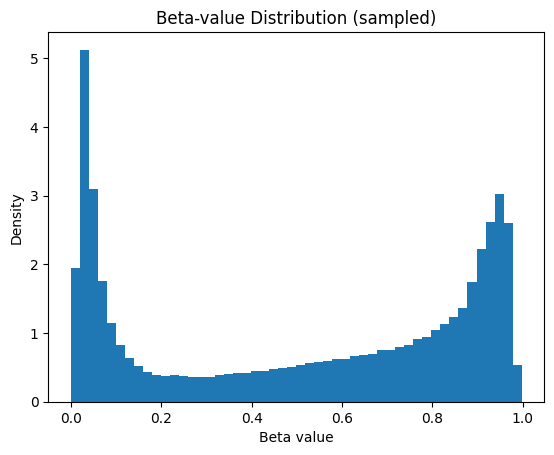

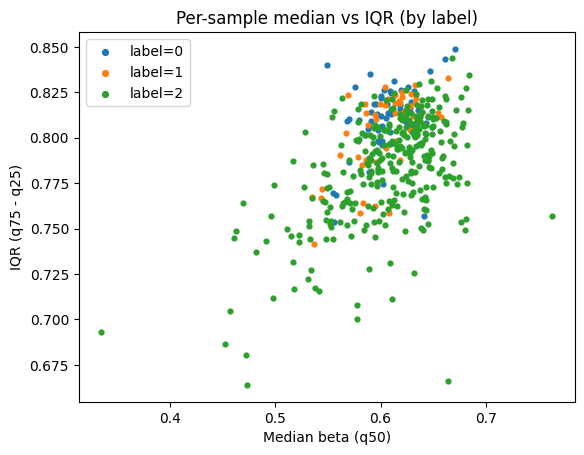

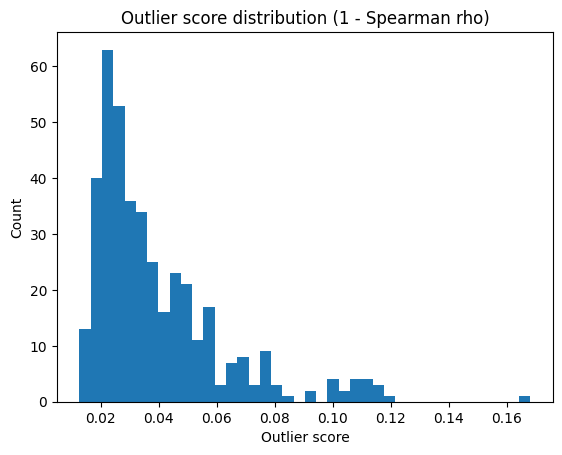

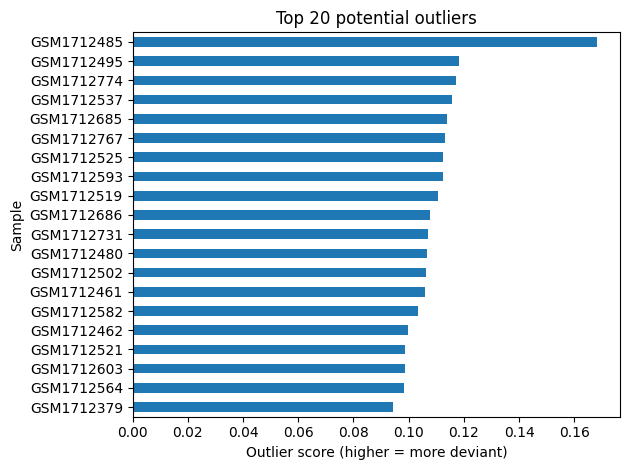


Top 10 potential outliers (higher distance = more deviant):
GSM1712485    0.168152
GSM1712495    0.118154
GSM1712774    0.117020
GSM1712537    0.115727
GSM1712685    0.113906
GSM1712767    0.113191
GSM1712525    0.112599
GSM1712593    0.112406
GSM1712519    0.110577
GSM1712686    0.107630
dtype: float64


In [6]:
# Split features and labels
LABEL_COL = 'label'
assert LABEL_COL in raw_dataset.columns, f"'{LABEL_COL}' column not found."

data = raw_dataset.copy()
X = data.drop(columns=[LABEL_COL])
y = data[LABEL_COL].astype(int)


# LIGHT DIAGNOSTICS
# (a) Per-sample distribution quantiles
quantiles = X.quantile([0.01, 0.25, 0.50, 0.75, 0.99], axis=1).T
quantiles.columns = ['q01', 'q25', 'q50', 'q75', 'q99']
iqr = quantiles['q75'] - quantiles['q25']

# (b) Outlier score via rank-based (Spearman-like) distance
rng = np.random.default_rng(42)
subset_size = min(50000, X.shape[1])  # cap to limit memory/time
subset_cols = rng.choice(X.columns, size=subset_size, replace=False)
Xsub = X[subset_cols]

ref = Xsub.median(axis=0)
ranked = Xsub.rank(axis=1, method='average')
ref_rank = ref.rank(method='average')

ranked_centered = ranked.sub(ranked.mean(axis=1), axis=0)
ref_centered = ref_rank - ref_rank.mean()

num = (ranked_centered * ref_centered).sum(axis=1)
den = np.sqrt((ranked_centered**2).sum(axis=1)) * np.sqrt((ref_centered**2).sum())
rho = (num / den).clip(-1, 1)
outlier_score = (1 - rho).sort_values(ascending=False)

# Final QC dataset (unchanged since I did not remove anything)
data_qc = pd.concat([y.rename(LABEL_COL), X], axis=1)

# PLOTS
# (a) Beta-value distribution (sampled)
plt.figure()
sample_n = min(30, X.shape[0])
feature_n = min(10000, X.shape[1])
sub_samples = rng.choice(X.index, size=sample_n, replace=False)
sub_features = rng.choice(X.columns, size=feature_n, replace=False)
vals = X.loc[sub_samples, sub_features].values.ravel()
plt.hist(vals, bins=50, density=True)
plt.title("Beta-value Distribution (sampled)")
plt.xlabel("Beta value")
plt.ylabel("Density")
plt.show()

# (b) Median vs IQR per sample, color-coded by label
plt.figure()
for lbl in sorted(y.unique()):
    mask = (y == lbl)
    plt.scatter(
        quantiles.loc[mask, 'q50'],
        iqr.loc[mask],
        label=f"label={lbl}",
        s=12
    )
plt.title("Per-sample median vs IQR (by label)")
plt.xlabel("Median beta (q50)")
plt.ylabel("IQR (q75 - q25)")
plt.legend(markerscale=1.2)
plt.show()

# (c) Histogram of outlier scores
plt.figure()
plt.hist(outlier_score.values, bins=40)
plt.title("Outlier score distribution (1 - Spearman rho)")
plt.xlabel("Outlier score")
plt.ylabel("Count")
plt.show()

# (d) Top 20 potential outliers (bar chart)
top_k = min(20, outlier_score.shape[0])
plt.figure()
outlier_score.head(top_k).iloc[::-1].plot(kind='barh')
plt.title(f"Top {top_k} potential outliers")
plt.xlabel("Outlier score (higher = more deviant)")
plt.ylabel("Sample")
plt.tight_layout()
plt.show()

# Save diagnostics if needed
qc_quantiles = quantiles
qc_outlier_score = outlier_score

print("\nTop 10 potential outliers (higher distance = more deviant):")
print(outlier_score.head(10))


**Come funziona la prossima cella? Cercare di capire soprattutto verificare se è uguale a quelche parte di Nastaran**
* Usa le **donne normali (label 0)** come **baseline robusta** per ogni CpG (mediana e MAD).
* Calcola per **ogni campione e CpG** uno **z-score robusto**; un CpG è *outlier* se |z| ≥ 3.5 (separando iper/ipometilato).
* **Riassume per campione** (quanti CpG outlier) e **per CpG** (tasso di outlier in normal/adjacent/tumor).
* Evidenzia i CpG con **maggiore differenza di tasso** tra **tumore** e **normale** (Δ).
* Mostra tre grafici chiave:

  1. **Burden** di outlier per campione, stratificato per label;
  2. **Scatter tumor vs normal** dei tassi di outlier per CpG;
  3. **Barplot dei TOP CpG** per |Δ|.



Done. Key artifacts:
 - data_outliers (per-sample outlier counts)
 - cpg_outliers_summary (per-CpG outlier rates and tumor-normal delta)
 - top_cpgs_by_delta (index only)

Top CpGs by |Δ (tumor - normal)|:
ID_REF
cg15466862    0.898061
cg24306397    0.884816
cg06629130    0.878193
cg25951981    0.873581
cg14231297    0.868259
cg15222899    0.866958
cg08833577    0.866249
cg26595643    0.864948
cg07351192    0.864948
cg17538572    0.861637
cg07149609    0.860336
cg05080154    0.859035
cg24604013    0.858325
cg13123165    0.856315
cg12604950    0.856315
cg02457680    0.855724
cg23208513    0.855014
cg09881545    0.855014
cg14871932    0.853713
cg03532926    0.851703
dtype: float64


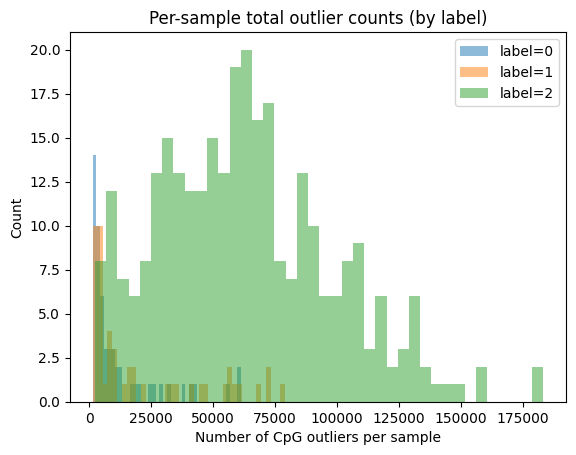

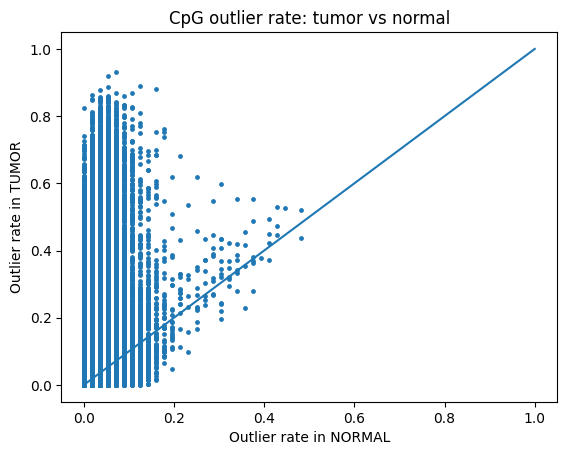

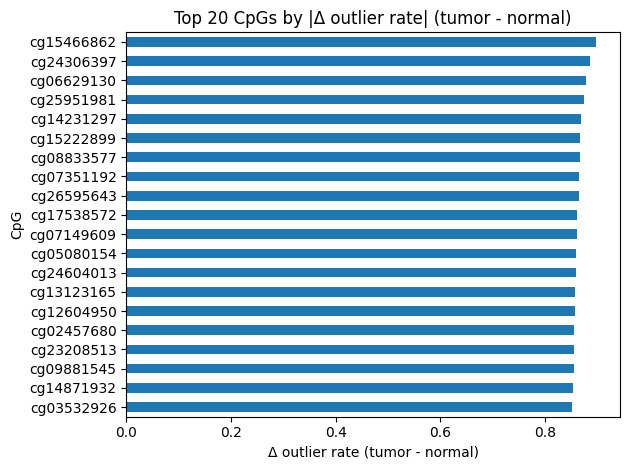

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --------------------------------------------------------------------
# Goal:
# - Detect CpG outliers at the sample level (extreme beta values per sample)
# - Use a group-aware baseline: reference = NORMAL (label == 0)
# - Summarize outlier burden per sample and per CpG
# - Prioritize CpGs with large tumor vs normal outlier-rate differences
#
# Assumptions:
# - raw_dataset: rows = samples (e.g., GSM IDs); columns = CpGs + 'label'
# - raw_dataset['label'] in {0: normal, 1: adjacent, 2: tumor}
# - Beta-values in [0,1]; no missing values
# - Large matrix: use memory-conscious choices (float32 where possible)
# --------------------------------------------------------------------

# -------------------------
# 0) Basic config
# -------------------------
LABEL_COL = 'label'
REFERENCE_LABEL = 0          # normal group as reference
OUTLIER_Z = 3.5              # robust threshold; 3.5 is a common choice for |z| outliers
MAX_POINTS_SCATTER = 50000   # sampling for scatter plot
TOP_K_CPGS = 20              # top CpGs to display by |Δ outlier-rate|

assert LABEL_COL in raw_dataset.columns, f"'{LABEL_COL}' column not found."
data = raw_dataset.copy()

# Split features and labels
y = data[LABEL_COL].astype(int)
X = data.drop(columns=[LABEL_COL])

# To reduce memory footprint
X = X.astype(np.float32)

# Identify groups
idx_ref = (y == REFERENCE_LABEL).values
idx_tumor = (y == 2).values
idx_normal = (y == 0).values
idx_adjacent = (y == 1).values

# -------------------------
# 1) Reference distribution per CpG (NORMALS only)
#    Use robust location/scale: median and MAD (|x - median| median)
#    Robust Z-score: z = (x - med_ref) / (1.4826 * MAD_ref + eps)
# -------------------------
eps = 1e-6

# Compute medians and MADs across samples in the reference group for each CpG
ref_values = X.loc[idx_ref]                         # samples x CpGs (normals)
ref_median = ref_values.median(axis=0).astype(np.float32)  # CpG-wise
ref_mad = (ref_values.sub(ref_median, axis=1).abs().median(axis=0).astype(np.float32))
ref_scale = 1.4826 * ref_mad + eps                  # robust scale

# -------------------------
# 2) Robust Z for every sample, CpG-wise
#    Broadcasting: (samples x CpGs - 1 x CpGs) / (1 x CpGs)
#    Beware of memory: compute in chunks if needed. Here we try in one shot.
# -------------------------
# Convert to numpy for speed; keep index/columns for mapping back
sample_ids = X.index
cpg_ids = X.columns

# Allocate output as needed
# To avoid storing the full z-matrix, we will compute outlier masks on the fly.
# If your RAM allows, you can compute the full z-matrix; otherwise keep it implicit.

# -------------------------
# 3) Outlier masks (hyper/hypo) for each sample
#    hyper = z >= OUTLIER_Z ; hypo = z <= -OUTLIER_Z
# -------------------------
# Compute z in chunks to limit peak memory
def iter_blocks(df, block_cols=50000):
    cols = df.columns
    for i in range(0, len(cols), block_cols):
        yield cols[i:i+block_cols]

hyper_mask_accum = []
hypo_mask_accum = []

for cols in iter_blocks(X):
    block = X[cols]
    med = ref_median[cols]
    scl = ref_scale[cols]
    z = (block - med) / scl  # DataFrame: samples x block_cpgs
    hyper_mask_accum.append((z >= OUTLIER_Z))
    hypo_mask_accum.append((z <= -OUTLIER_Z))

# Concatenate masks across blocks
hyper_mask = pd.concat(hyper_mask_accum, axis=1)
hypo_mask  = pd.concat(hypo_mask_accum,  axis=1)
# Ensure column order matches original
hyper_mask = hyper_mask[cpg_ids]
hypo_mask  = hypo_mask[cpg_ids]

# -------------------------
# 4) Summaries
# -------------------------
# 4.1 Outlier burden per sample
hyper_count_per_sample = hyper_mask.sum(axis=1)
hypo_count_per_sample  = hypo_mask.sum(axis=1)
total_count_per_sample = hyper_count_per_sample + hypo_count_per_sample

# 4.2 Outlier rate per CpG within groups
def _rate_per_cpg(mask_df, group_index):
    # mask_df: samples x CpGs (bool)
    # group_index: boolean index over samples
    denom = max(int(group_index.sum()), 1)
    return mask_df.loc[group_index].sum(axis=0) / denom

# Per-CpG outlier rates by group (hyper + hypo combined or separated)
# Here we combine hyper and hypo for a single "is-outlier" indicator
cpq_outlier_mask = hyper_mask | hypo_mask

rate_tumor   = _rate_per_cpg(cpq_outlier_mask, idx_tumor)
rate_normal  = _rate_per_cpg(cpq_outlier_mask, idx_normal)
rate_adj     = _rate_per_cpg(cpq_outlier_mask, idx_adjacent)

# Δ outlier-rate tumor vs normal
delta_tumor_normal = (rate_tumor - rate_normal)

# Rank CpGs by |Δ|
top_cpgs_by_delta = delta_tumor_normal.abs().sort_values(ascending=False).head(TOP_K_CPGS)
top_cpgs_signed = delta_tumor_normal.loc[top_cpgs_by_delta.index]

# -------------------------
# 5) Minimal outputs for downstream steps
# -------------------------
# data_outliers: sample-level counts (useful for QC and for checking per-group burden)
data_outliers = pd.DataFrame({
    'label': y,
    'hyper_outliers': hyper_count_per_sample,
    'hypo_outliers': hypo_count_per_sample,
    'total_outliers': total_count_per_sample
}, index=sample_ids)

# cpg_outliers_summary: per-CpG outlier rates and delta (prioritization)
cpg_outliers_summary = pd.DataFrame({
    'rate_normal': rate_normal,
    'rate_adjacent': rate_adj,
    'rate_tumor': rate_tumor,
    'delta_tumor_minus_normal': delta_tumor_normal
}, index=cpg_ids).sort_values('delta_tumor_minus_normal', ascending=False)

print("Done. Key artifacts:")
print(" - data_outliers (per-sample outlier counts)")
print(" - cpg_outliers_summary (per-CpG outlier rates and tumor-normal delta)")
print(" - top_cpgs_by_delta (index only)")
print("\nTop CpGs by |Δ (tumor - normal)|:")
print(top_cpgs_signed.sort_values(ascending=False))

# -------------------------
# 6) Plots (matplotlib only; one chart per figure; no explicit colors)
# -------------------------

# 6.1 Per-sample total outliers by label (histogram of counts)
plt.figure()
for lbl in sorted(y.unique()):
    vals = data_outliers.loc[y == lbl, 'total_outliers'].values
    plt.hist(vals, bins=40, alpha=0.5, label=f"label={lbl}")
plt.title("Per-sample total outlier counts (by label)")
plt.xlabel("Number of CpG outliers per sample")
plt.ylabel("Count")
plt.legend()
plt.show()

# 6.2 CpG outlier-rate: tumor vs normal (scatter, sampled)
plt.figure()
# Sampling to keep the plot light
all_cpgs = cpg_ids
if len(all_cpgs) > MAX_POINTS_SCATTER:
    rng = np.random.default_rng(123)
    sampled = rng.choice(all_cpgs, size=MAX_POINTS_SCATTER, replace=False)
else:
    sampled = all_cpgs
plt.scatter(rate_normal.loc[sampled], rate_tumor.loc[sampled], s=6)
plt.plot([0,1],[0,1])  # y=x reference
plt.title("CpG outlier rate: tumor vs normal")
plt.xlabel("Outlier rate in NORMAL")
plt.ylabel("Outlier rate in TUMOR")
plt.show()

# 6.3 Top-K CpGs by |Δ tumor-normal| (bar chart, signed)
plt.figure()
top_series = top_cpgs_signed.sort_values(ascending=True)  # for horizontal bar
top_series.plot(kind='barh')
plt.title(f"Top {TOP_K_CPGS} CpGs by |Δ outlier rate| (tumor - normal)")
plt.xlabel("Δ outlier rate (tumor - normal)")
plt.ylabel("CpG")
plt.tight_layout()
plt.show()

# -------------------------
# 7) Optional: export results
# -------------------------
# data_outliers.to_csv("per_sample_outlier_counts.csv")
# cpg_outliers_summary.to_csv("per_cpg_outlier_rates_and_delta.csv")
# pd.Series(top_cpgs_signed, name='delta_tumor_minus_normal').to_csv("top_cpgs_by_delta.csv")


## References

[1] National Center for Biotechnology Information, “GSE69914 on GEO Datasets,” *Gene Expression Omnibus (GEO)*, 2015. [Online]. Available: [https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE69914](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE69914). 